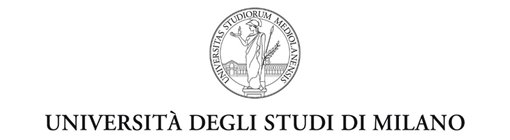

facoltà di Scienze Politiche, Economiche e Sociali
 "Algorithms for massive data" project report, 2022-2023


# Topic: Market-basket analysis (Project 2)
 
Writer: Elaheh Esfandi

### step 0:installing the packages we need

In [ ]:
#these coding is in python programming language
# installing the apyori package
!pip install apyori
!pip install kaggle
! pip install -q kaggle
!pip install --user kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=1f221e371d5fcf0efe3e59a26c7b4f5bd9f3a3d9f3bc9bc215a02555060037d9
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### step 1: importing datasets and the libraries

In [ ]:
# importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import warnings

In [ ]:
# Kaggle API to download the dataset
import os
kaggle_api = {"username":"elahehesfandi","key":"41e03ac289789da796faac7f5ea71662"}
os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
os.environ['KAGGLE_KEY'] = kaggle_api['key']

In [ ]:
# Kaggle authentication and download
import kaggle
kaggle.api.authenticate()
!  kaggle datasets download BwandoWando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows


100% 11.9G/11.9G [01:01<00:00, 249MB/s]
100% 11.9G/11.9G [01:01<00:00, 209MB/s]


In [ ]:
 ! unzip ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip && rm ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip 

Archive:  ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip
  inflating: 0819_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0820_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0821_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0822_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0823_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0824_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0825_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0826_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0827_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0828_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0829_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0830_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0831_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0901_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0902_UkraineCombinedTweetsDeduped.csv.gzip  
  inflating: 0903_UkraineCombinedTweetsDeduped.csv.gzip  
  inflat

In [ ]:
#due to the mass database, i choose  only one dataset from above to analysis.
d1 = r"/content/UkraineWar/UkraineWar/UkraineCombinedTweetsDeduped20220227-131611.csv.gzip"
d2= r"/content/UkraineWar/UkraineWar/0818_UkraineCombinedTweetsDeduped.csv.gzip" 
d3= r"/content/UkraineWar/UkraineWar/UkraineCombinedTweetsDeduped_MAR31.csv.gzip"


In [ ]:
df1 = pd.read_csv(d1, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df2 = pd.read_csv(d2, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df3 = pd.read_csv(d3, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
d= pd.concat([df1, df2,df3], axis = 1)

In [ ]:
d.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts', 'userid', 'username', 'acctdesc',
       'location', 'following', 'followers', 'totaltweets', 'usercreatedts',
       'tweetid', 'tweetcreatedts', 'retweetcount', 'text', 'hashtags',
       'language', 'coordinates', 'favorite_count', 'is_retweet',
       'original_tweet_id', 'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts',
       'userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates

In [ ]:
#title text
d[0:2].T

,0,1
tokenized_sents,"[Footage, of, the, airport, bombing, in, Ivano...",NaN
tokenized_sents,"[Welcome, to, our, shelter, Located, in, Ukrai...",NaN
userid,310044382.0,1414872724292337664.0
username,Barrie360,silpantipolo
acctdesc,What Barrie's talking about. From local news t...,This is the official Twitter account of San Is...
location,"Barrie, Ontario",Diocese of Antipolo
following,678.0,9.0
followers,16818.0,14.0
totaltweets,106996.0,398.0
usercreatedts,2011-06-03 03:17:10.000000,2021-07-13 09:03:02.000000


## case(1): text 

In [ ]:
df1.text 

0          Footage of the airport bombing in Ivano-Franki...
1          12.37 น. เจมส์ วอเตอร์เฮาส์ ผู้สื่อข่าว BBC ใน...
2          Die Rede von #Putin ist echt gruselig:\n"Russl...
3          Ukraine MP Sophia Fedyna tells about the groun...
4          รัสเซียยิงขีปนาวุธรัวๆไปยังยูเครน\n#รัสเซียยูเ...
                                 ...                        
1229344    #Russian military leaders should think very ca...
1229345    #Ukraine #pok #India\n@PMOIndia @AmitShah \n@m...
1229346    ด่วน! เยอรมันช่วยยูเครนสู้รัสเซีย นายกประกาศส่...
1229347    Photographic evidence now points towards Russi...
1229348    Did #Ukrainian Ambassador Indirectly Threatene...
Name: text, Length: 1229349, dtype: object

In [ ]:
d_en=df1[df1['language']=='en']['text'].tolist()
d_en2=list(set(d_en))
for item in d_en2[0:1000]:
    print(item.replace('\n',''))
    print()

guys, as being originally russian i feel ashamed of how our leader has done to ukraine and pray for ukraine 🇺🇦❤ #saveukraine #russia #Putin #JusticeForUkraine #russianinvasion #RussiaUkraineConflict #Ukraine

@SawyerMerritt now #russia and #ukraine people need to get their money in banks #doge #lrc 🇷🇺 🇺🇦

@AstroZeroNFT will provide GAS FREE #NFT Minting very soon! 💪          Create art, buy and sell for just a minor fee.  💰 #ELONONE that powers it, is just $5.5 mill cap!!!!!! 💎 EASY 200X 🔥🔥🔥 #Ukrania #UkraineUnderAttack #UkraineRussiaWar #eth #btc #Putin https://t.co/wEhFWZSUxA

People from around the world are signing this open letter against the war. Add your voice, and stand with the people of #Ukraine!#NoWar #StandWithUkraine  https://t.co/DpqvGi2dN5

Care your feelings/emotions/support.West  always one, they consider Asian countries second and third world nations.Indians stay strong stand for your nation don't fall prey for Western crocodile tears#UkraineRussia #Russia #Kyiv #Modi

In [ ]:
#the first data
tweet = df1[df1['language'] == 'en'] #tweets with only english language
tweet_df = tweet.loc[:,['text']]    #content of the tweets
tweet_df.head()

,text
0,Footage of the airport bombing in Ivano-Franki...
3,Ukraine MP Sophia Fedyna tells about the groun...
5,A cruise missile fired by the Russian army fel...
13,"SPREAD AND SHARE, YOU CAN HELP UKRAINE #Ukrain..."
14,Footage of the airport bombing in Ivano-Franki...


In [ ]:
#the second day data
tweet = df2[df2['language'] == 'en'] #tweets with only english language
tweet2_df = tweet.loc[:,['text']]    #content of the tweets
tweet2_df.head()

,text
0,"Welcome to our shelter!\nLocated in Ukraine, K..."
5,Will the #sanctions imposed on #Russia cause a...
6,After nine days of explosions rocking Russian ...
7,NSA Ajit Doval is right now in Russia. He met ...
9,@soopajx @Nicole7526 @JoeBiden but what about ...


In [ ]:
def clean_text(text):
#remove punctuation   
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
#remove numbers
    text = re.sub(r'\w*\d\w*', '', text)
# remove 'text; and 'indices'
    text=re.sub(r'text', '', text)
    text=re.sub(r'indices', '', text)
# remove website
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'JW', '', text)
# remove the emoji 
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'', text)
    return text

In [ ]:
import re
import string
tweetsdf = pd.DataFrame(tweet_df.text.apply(lambda x: clean_text(x)))#the first day data
tweetsdf2 = pd.DataFrame(tweet2_df.text.apply(lambda x: clean_text(x)))#the second day data
tweetsdf

,text
0,Footage of the airport bombing in IvanoFrankiv...
3,Ukraine MP Sophia Fedyna tells about the groun...
5,A cruise missile fired by the Russian army fel...
13,SPREAD AND SHARE YOU CAN HELP UKRAINE Ukraine ...
14,Footage of the airport bombing in IvanoFrankiv...
...,...
1229342,In a world full of Putins be a Zelenskyy Ukrai...
1229343,ZelenskyyUa azpresident SOCARofficial million...
1229344,Russian military leaders should think very car...
1229347,Photographic evidence now points towards Russi...


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
df1['tokenized_sents'] = tweetsdf.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)#the first day data
df2['tokenized_sents'] = tweetsdf2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)#the last day data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df1['tokenized_sents'] #the first day data

0          [Footage, of, the, airport, bombing, in, Ivano...
1                                                        NaN
2                                                        NaN
3          [Ukraine, MP, Sophia, Fedyna, tells, about, th...
4                                                        NaN
                                 ...                        
1229344    [Russian, military, leaders, should, think, ve...
1229345                                                  NaN
1229346                                                  NaN
1229347    [Photographic, evidence, now, points, towards,...
1229348    [Did, Ukrainian, Ambassador, Indirectly, Threa...
Name: tokenized_sents, Length: 1229349, dtype: object

In [ ]:
df2['tokenized_sents'] #the last day data

0        [Welcome, to, our, shelter, Located, in, Ukrai...
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
48061                                                  NaN
48062    [in, South, Africa, Woken, by, postsurgical, p...
48063    [Russia, warehouse, In, the, Belgorod, region,...
48064    [ignored, all, these, evidences, and, they, ha...
48065    [A, reminder, that, Russia, ’, s, invasion, of...
Name: tokenized_sents, Length: 48066, dtype: object

In [ ]:
# Using filter() method to filter nan values
df1 =df1['tokenized_sents'].dropna()#the first day data
df2=df2['tokenized_sents'].dropna()#the last day data

In [ ]:
tweets= df1.tolist()#the first day data
tweets2= df2.tolist()#the last day data
tweets

[['Footage',
  'of',
  'the',
  'airport',
  'bombing',
  'in',
  'IvanoFrankivsk',
  'Ukraine',
  'Russia'],
 ['Ukraine',
  'MP',
  'Sophia',
  'Fedyna',
  'tells',
  'about',
  'the',
  'ground',
  'situation',
  'in',
  'Kyiv',
  'in',
  'an',
  'exclusive',
  'conversation',
  'with',
  'AkshitaN',
  'ITVideo',
  'Russia',
  'Ukraine',
  'Kyiv',
  'Kharkiv'],
 ['A',
  'cruise',
  'missile',
  'fired',
  'by',
  'the',
  'Russian',
  'army',
  'fell',
  'on',
  'Kiev',
  'Ukraine',
  'Russia'],
 ['SPREAD',
  'AND',
  'SHARE',
  'YOU',
  'CAN',
  'HELP',
  'UKRAINE',
  'Ukraine',
  'Russia'],
 ['Footage',
  'of',
  'the',
  'airport',
  'bombing',
  'in',
  'IvanoFrankivsk',
  'Ukraine',
  'Russia'],
 ['Footage',
  'of',
  'the',
  'airport',
  'bombing',
  'in',
  'IvanoFrankivsk',
  'Ukraine',
  'Russia'],
 ['Now',
  'this',
  'is',
  'wrong',
  'absolutely',
  'wrong',
  'for',
  'JoeBiden',
  'NATO',
  'UN',
  'and',
  'EUCommission',
  'to',
  'sit',
  'amp',
  'watch',
  'Putin

In [ ]:
from dataclasses import replace
# Using filter() method to filter None values
tweets1 = list(filter(None, tweets))#the first day data
tweets2 = list(filter(None, tweets2))#the last day data

# case(1), Step 3: Training apriori model

In [ ]:
import apyori
from apyori import apriori
rule = apriori(transactions = tweets1, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)#the first day data
rule2 = apriori(transactions = tweets2, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)#the last day data

### case(1),Step 4: Visualising the results

Support: Support is the basic probability of an event to occur. If we have an event to buy product A, Support(A) is the number of transactions which includes A divided by total number of transactions.

Confidence: The confidence of an event is the conditional probability of the occurrence; the chances of A happening given B has already happened.

Lift: This is the ratio of confidence to expected confidence.The probability of all of the items in a rule occurring together (otherwise known as the support) divided by the product of the probabilities of the items on the left and right side occurring as if there was no association between them.

The lift value tells us how much better a rule is at predicting something than randomly guessing. The higher the lift, the stronger the association.

In [ ]:
output = list(rule) # returns a non-tabular output /#the first day data
output2 = list(rule2) # returns a non-tabular output / #the last day data
print(len(output))
type(output)

In [ ]:
type(tweets)

list

In [ ]:
# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))

In [ ]:
output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift']) #the first day data
output2_DataFrame = pd.DataFrame(inspect(output2), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift']) #the last day data

In [ ]:
output_DataFrame.nlargest(n = 10, columns = 'Lift') #the first day data

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
230,Kalashnikov,surreal,0.005272,0.977191,179.745521
213,Kalashnikov,bear,0.005272,0.977191,162.585550
691,bear,surreal,0.005272,0.877157,161.345070
229,Kalashnikov,sounds,0.005272,0.977191,150.406339
252,OpKremlin,broadcast,0.004751,0.894792,149.667771
1257,sounds,surreal,0.005272,0.811449,149.258783
30,FckPutin,OpKremlin,0.004827,0.767253,144.510457
225,Kalashnikov,prepare,0.005272,0.977191,141.351877
1184,prepare,surreal,0.005272,0.762600,140.273404
690,bear,sounds,0.005273,0.877387,135.044732


In [ ]:
output2_DataFrame.nlargest(n = 10, columns = 'Lift') #the laast day data

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
56,ArsonColeUkraine,NEWsampRTs,0.005219,1.000000,191.591667
188,Embargo,Infanticide,0.005480,0.984375,178.202879
7,AndrzejDuda,Infanticide,0.005524,0.976923,176.853846
302,Infanticide,Murder,0.005524,1.000000,176.853846
3,AndrzejDuda,Embargo,0.005480,0.969231,174.090505
193,Embargo,Murder,0.005480,0.984375,174.090505
12,AndrzejDuda,Murder,0.005524,0.976923,172.772604
314,Infanticide,oleksiireznikov,0.005524,1.000000,171.574627
205,Embargo,oleksiireznikov,0.005480,0.984375,168.893773
33,Anti,Infanticide,0.005524,0.927007,167.817518


# case(2): hashtag 

In [ ]:
#due to the mass database, i choose  only one dataset from above to analysis.
data = r"/content/UkraineWar/UkraineWar/UkraineCombinedTweetsDeduped20220227-131611.csv.gzip" #the first day data
data1= r"/content/UkraineWar/UkraineWar/0818_UkraineCombinedTweetsDeduped.csv.gzip" #the last day data

In [ ]:
df = pd.read_csv(data, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL) #the first day data
df2 = pd.read_csv(data1, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL) #the last day data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.hashtags #the first day data

0          [{'text': 'Ukraine', 'indices': [68, 76]}, {'t...
1                                                         []
2          [{'text': 'Putin', 'indices': [13, 19]}, {'tex...
3               [{'text': 'ITVideo', 'indices': [130, 138]}]
4          [{'text': 'รัสเซียยูเครน', 'indices': [50, 64]...
                                 ...                        
1229344    [{'text': 'Russian', 'indices': [16, 24]}, {'t...
1229345    [{'text': 'Ukraine', 'indices': [0, 8]}, {'tex...
1229346                                                   []
1229347                                                   []
1229348    [{'text': 'Ukrainian', 'indices': [23, 33]}, {...
Name: hashtags, Length: 1229349, dtype: object

In [ ]:
df2.hashtags ##he last day data

0        [{'text': 'Ukraine', 'indices': [194, 202]}, {...
1        [{'text': 'chineses', 'indices': [10, 19]}, {'...
2        [{'text': 'Rusia', 'indices': [0, 6]}, {'text'...
3              [{'text': 'Mariupol', 'indices': [35, 44]}]
4        [{'text': 'Donbás', 'indices': [25, 32]}, {'te...
                               ...                        
48061    [{'text': 'russiaisateroriststate', 'indices':...
48062    [{'text': 'Crimea', 'indices': [109, 116]}, {'...
48063    [{'text': 'Russia', 'indices': [0, 7]}, {'text...
48064         [{'text': 'Ukraine', 'indices': [200, 208]}]
48065    [{'text': 'StopRussia', 'indices': [212, 223]}...
Name: hashtags, Length: 48066, dtype: object

In [ ]:
df.info() #the first day data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229349 entries, 0 to 1229348
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   userid          1229349 non-null  int64 
 1   username        1229349 non-null  object
 2   acctdesc        976379 non-null   object
 3   location        714338 non-null   object
 4   following       1229349 non-null  int64 
 5   followers       1229349 non-null  int64 
 6   totaltweets     1229349 non-null  int64 
 7   usercreatedts   1229349 non-null  object
 8   tweetid         1229349 non-null  int64 
 9   tweetcreatedts  1229349 non-null  object
 10  retweetcount    1229349 non-null  int64 
 11  text            1229349 non-null  object
 12  hashtags        1229349 non-null  object
 13  language        1229349 non-null  object
 14  coordinates     119 non-null      object
 15  favorite_count  1229349 non-null  int64 
 16  extractedts     1229349 non-null  object
dtypes: int64

In [ ]:
print(df['language'].unique().tolist()) #the first day data
print(df2['language'].unique().tolist()) #the last day data

['en', 'th', 'de', 'es', 'ta', 'tr', 'lt', 'fi', 'ru', 'und', 'fr', 'ht', 'no', 'in', 'pl', 'uk', 'pt', 'ar', 'nl', 'bn', 'it', 'hi', 'iw', 'ckb', 'ur', 'mr', 'el', 'ps', 'gu', 'ml', 'ja', 'ca', 'et', 'zh', 'sv', 'fa', 'cs', 'te', 'da', 'or', 'tl', 'ro', 'ko', 'pa', 'si', 'sl', 'bg', 'kn', 'my', 'lv', 'eu', 'vi', 'hu', 'am', 'is', 'ka', 'sr', 'cy', 'ne', 'dv', 'sd', 'hy', 'km', 'lo']
['en', 'pt', 'es', 'ht', 'sr', 'uk', 'und', 'nl', 'ja', 'sl', 'ru', 'et', 'de', 'ta', 'it', 'fr', 'zh', 'gu', 'fa', 'sv', 'lv', 'ka', 'cs', 'eu', 'ro', 'el', 'lt', 'tr', 'th', 'pl', 'fi', 'in', 'ur', 'ko', 'kn', 'hi', 'tl', 'da', 'bg', 'cy', 'iw', 'ca', 'is', 'vi', 'ar', 'te', 'no', 'ml', 'bn', 'am', 'ps', 'si', 'pa', 'or', 'my', 'mr', 'hu', 'ne', 'hy', 'ckb', 'sd']


In [ ]:
#the first day data
df_en=df[df['language']=='en']['hashtags'].tolist()
df_en2=list(set(df_en))
for item in df_en2[0:1000]:
    print(item.replace('\n',''))
    print()

[{'text': 'WWIII', 'indices': [26, 32]}, {'text': 'RussiaUkraineConflict', 'indices': [70, 92]}]

[{'text': 'UkraineRussiaWar', 'indices': [80, 97]}, {'text': 'RussiaUkraineWar', 'indices': [98, 115]}]

[{'text': 'Russia', 'indices': [210, 217]}, {'text': 'Ukraine', 'indices': [218, 226]}, {'text': 'USA', 'indices': [227, 231]}, {'text': 'China', 'indices': [232, 238]}, {'text': 'Peace', 'indices': [239, 245]}, {'text': 'worldwar3', 'indices': [246, 256]}]

[{'text': 'VitaliKlitschko', 'indices': [21, 37]}, {'text': 'Kyiv', 'indices': [97, 102]}, {'text': 'Ukraine', 'indices': [106, 114]}]

[{'text': 'UkraineUnderAttack', 'indices': [118, 137]}, {'text': 'UkraineRussiaWar', 'indices': [138, 155]}]

[{'text': 'BBMzansi', 'indices': [207, 216]}, {'text': 'Putin', 'indices': [217, 223]}]

[{'text': 'stopwar', 'indices': [22, 30]}, {'text': 'StandWithUkraine', 'indices': [31, 48]}, {'text': 'UkraineRussia', 'indices': [49, 63]}]

[{'text': 'Israel', 'indices': [27, 34]}, {'text': 'Gaza', '

In [ ]:
#the last day data 
df2_en=df2[df2['language']=='en']['hashtags'].tolist()
df2_en2=list(set(df2_en))
for item in df2_en2[0:1000]:
    print(item.replace('\n',''))
    print()

[{'text': 'SlavaUkraini', 'indices': [44, 57]}]

[{'text': 'UkraineRussiaWar', 'indices': [121, 138]}, {'text': 'newsreedom', 'indices': [139, 150]}, {'text': 'reedom', 'indices': [151, 158]}, {'text': 'BreakingNews', 'indices': [159, 172]}, {'text': 'PINKVENOM', 'indices': [173, 183]}, {'text': 'Ukraine', 'indices': [184, 192]}, {'text': 'Russia', 'indices': [193, 200]}, {'text': 'defense', 'indices': [201, 209]}, {'text': 'sanctions', 'indices': [210, 220]}, {'text': 'news', 'indices': [221, 226]}, {'text': 'NewsUpdate', 'indices': [227, 238]}, {'text': 'USA', 'indices': [239, 243]}]

[{'text': 'Moscow', 'indices': [87, 94]}, {'text': 'Nuclear', 'indices': [95, 103]}, {'text': 'Removal', 'indices': [104, 112]}, {'text': 'Russian', 'indices': [113, 121]}, {'text': 'Turkish', 'indices': [122, 130]}]

[{'text': 'Crimea', 'indices': [36, 43]}, {'text': 'Kerch', 'indices': [55, 61]}, {'text': 'Stalingrad', 'indices': [125, 136]}, {'text': 'logistics', 'indices': [166, 176]}]

[{'text': 'S

In [ ]:
#the first day data
tweet = df[df['language'] == 'en'] #tweets with only english language
tweet_df = tweet.loc[:,['hashtags']]    #content of the tweets
tweet_df.head()

,hashtags
0,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t..."
3,"[{'text': 'ITVideo', 'indices': [130, 138]}]"
5,"[{'text': 'Ukraine', 'indices': [72, 80]}, {'t..."
13,"[{'text': 'Ukraine', 'indices': [55, 63]}, {'t..."
14,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t..."


In [ ]:
#the last day data
tweet2 = df2[df2['language'] == 'en'] #tweets with only english language
tweet2_df = tweet2.loc[:,['hashtags']]    #content of the tweets
tweet2_df.head()

,hashtags
0,"[{'text': 'Ukraine', 'indices': [194, 202]}, {..."
5,"[{'text': 'sanctions', 'indices': [9, 19]}, {'..."
6,"[{'text': 'Russia', 'indices': [218, 225]}, {'..."
7,"[{'text': 'BrassTacks', 'indices': [188, 199]}..."
9,"[{'text': 'LockTrumpUp', 'indices': [104, 116]..."


In [ ]:
def clean_text(text):
#remove punctuation   
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
#remove numbers
    text = re.sub(r'\w*\d\w*', '', text)
# remove 'text; and 'indices'
    text=re.sub(r'text', '', text)
    text=re.sub(r'indices', '', text)

    return text

In [ ]:
import re
import string
tweetsdf = pd.DataFrame(tweet_df.hashtags.apply(lambda x: clean_text(x)))#the first day data
tweetsdf2 = pd.DataFrame(tweet2_df.hashtags.apply(lambda x: clean_text(x)))#the last day data
tweetsdf

,hashtags
0,Ukraine Russia
3,ITVideo
5,Ukraine Russia
13,Ukraine Russia
14,Ukraine Russia
...,...
1229342,Ukraine
1229343,
1229344,Russian Putin
1229347,


for doing the Market-basket analysis, we need to find the frequent item in each tweets. then unsing the apori algorithm for the finial analysis 

In [ ]:
type(tweetsdf)

pandas.core.frame.DataFrame

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
df['tokenized_sents'] = tweetsdf.apply(lambda row: nltk.word_tokenize(row['hashtags']), axis=1)#the first day data
df2['tokenized_sents'] = tweetsdf2.apply(lambda row: nltk.word_tokenize(row['hashtags']), axis=1)#the last day data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Using filter() method to filter nan values
df =df['tokenized_sents'].dropna()#the first day data
df2=df2['tokenized_sents'].dropna()#the last day data

### case(2),step 2: Transforming our data frame into a list dataset

In [ ]:
tweets= df.tolist()#the first day data
tweets2= df2.tolist()#the last day data
tweets

[['Ukraine', 'Russia'],
 ['ITVideo'],
 ['Ukraine', 'Russia'],
 ['Ukraine', 'Russia'],
 ['Ukraine', 'Russia'],
 ['Ukraine', 'Russia'],
 ['Putin', 'Ukraine'],
 ['Russia', 'Ukraine', 'UkraineWar', 'RussiaWar', 'Europe'],
 ['Ukraine', 'Russia'],
 ['Mascow'],
 ['Ukraine',
  'Putin',
  'Ukraina',
  'UkraineRussie',
  'UkraineRussiaCrisis',
  'UkraineConflict',
  'UkraineCrisis'],
 ['รัสเซียยูเครน',
  'RussiaUkraine',
  'ยูเครน',
  'รัสเซีย',
  'รัสเซียบุกยูเครน',
  'UkraineCrisis'],
 ['Ukraine', 'Russia'],
 ['Ukraine',
  'Russia',
  'UkraineRussie',
  'RussiaUkraine',
  'Ukraina',
  'UN',
  'emergency'],
 ['Ukraine',
  'Russia',
  'TerceraGuerraMundial',
  'rusia',
  'ucrania',
  'UkraineRussie'],
 ['RussiaUkraineConflict',
  'UkraineRussiaCrisis',
  'Putin',
  'StandWithUkraine',
  'WorldWarIII',
  'UkraineRussiaCrisis',
  'Ukraina',
  'Russia',
  'RussiaUkraineConflict',
  'Ukraine',
  'UkraineInvasion',
  'UkraineRussia',
  'WorldWarIII',
  'StandWithUkraine'],
 ['Putin',
  'theWest',
  '

In [ ]:
from dataclasses import replace
# Using filter() method to filter None values
tweets1 = list(filter(None, tweets))#the first day data
tweets2 = list(filter(None, tweets2))#the last day data

### case(2),Step 3: Training apriori model

In [ ]:
import apyori
from apyori import apriori
rule = apriori(transactions = tweets1, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)#the first day data
rule2 = apriori(transactions = tweets2, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)#the last day data

### case(2),Step 4: Visualising the results

Support: Support is the basic probability of an event to occur. If we have an event to buy product A, Support(A) is the number of transactions which includes A divided by total number of transactions.

Confidence: The confidence of an event is the conditional probability of the occurrence; the chances of A happening given B has already happened.

Lift: This is the ratio of confidence to expected confidence.The probability of all of the items in a rule occurring together (otherwise known as the support) divided by the product of the probabilities of the items on the left and right side occurring as if there was no association between them.

The lift value tells us how much better a rule is at predicting something than randomly guessing. The higher the lift, the stronger the association.

In [ ]:
output = list(rule) # returns a non-tabular output /#the first day data
output2 = list(rule2) # returns a non-tabular output / #the last day data
print(len(output))
type(output)

7


list

In [ ]:
type(tweets)

list

In [ ]:
# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))

In [ ]:
output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift']) #the first day data
output2_DataFrame = pd.DataFrame(inspect(output2), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift']) #the last day data

In [ ]:
output_DataFrame  #the first day data

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,Kiev,Kyiv,0.005597,0.297179,3.998680
1,WWIII,RussiaUkraineConflict,0.011040,0.323328,5.824241
2,UkraineInvasion,UkraineRussia,0.009067,0.325729,5.900204
3,UkraineUnderAttack,UkraineRussia,0.010772,0.246037,4.456670
4,UkraineWar,UkraineRussia,0.007631,0.296250,5.366221
5,UkraineWar,UkraineUnderAttack,0.008427,0.327153,7.472372
6,russia,ukraine,0.010695,0.587674,18.020824


In [ ]:
output_DataFrame.nlargest(n = 10, columns = 'Lift') #the first day data

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
6,russia,ukraine,0.010695,0.587674,18.020824
5,UkraineWar,UkraineUnderAttack,0.008427,0.327153,7.472372
2,UkraineInvasion,UkraineRussia,0.009067,0.325729,5.900204
1,WWIII,RussiaUkraineConflict,0.011040,0.323328,5.824241
4,UkraineWar,UkraineRussia,0.007631,0.296250,5.366221
3,UkraineUnderAttack,UkraineRussia,0.010772,0.246037,4.456670
0,Kiev,Kyiv,0.005597,0.297179,3.998680


In [ ]:
output2_DataFrame  #the last day data

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,Mariupol,ArmUkraineNow,0.004672,0.416667,16.781661
1,ArsonCole,Ukraine,0.006496,1.000000,3.594690
2,BB,Biden,0.006363,1.000000,17.682140
3,BB,Breaking,0.006363,1.000000,95.634043
4,BB,CNN,0.006363,1.000000,120.181818
...,...,...,...,...,...
176,World,twitter,0.006363,0.794444,118.240692
177,russia,ukraine,0.014061,0.395494,10.721762
178,visabanforrussians,russiaisateroriststate,0.004895,0.366667,5.762564
179,saudi,twitter,0.006363,0.986207,146.781548


In [ ]:
output2_DataFrame.nlargest(n = 10, columns = 'Lift') #the last day data

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
81,Fascism,Infanticide,0.005651,0.920290,162.855072
97,Infanticide,MLRS,0.005651,1.000000,161.683453
7,BB,Movie,0.006363,1.000000,157.160839
16,BB,Vote,0.006363,1.000000,154.993103
18,BB,saudi,0.006363,1.000000,154.993103
111,Movie,Vote,0.006363,1.000000,154.993103
113,Movie,saudi,0.006363,1.000000,154.993103
173,Vote,saudi,0.006363,0.986207,152.855268
19,BB,twitter,0.006363,1.000000,148.834437
99,Infanticide,StandUpForUkraine,0.005651,1.000000,148.834437


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


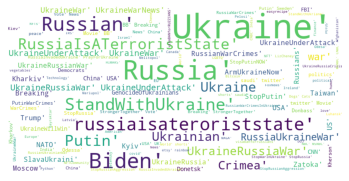

In [ ]:
# nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                     max_words = 300,
                     max_font_size = 40,
                      scale = 2,
                     random_state = 42).generate(str(tweets2[:500]))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()